# Feature Engineering

| Technique                        | What it does                                        | Example                                  |
| -------------------------------- | --------------------------------------------------- | ---------------------------------------- |
| **Handling missing values**      | Fill or drop missing data                           | Fill empty "Age" with average age        |
| **Encoding categorical data**    | Convert text categories to numbers                  | "Male"/"Female" → 1/0                    |
| **Scaling**                      | Normalize data to a common scale                    | Bringing "Age" and "Salary" to 0-1 range |
| **Binning**                      | Convert continuous values to groups                 | Age → "Youth", "Adult", "Senior"         |
| **Datetime features**            | Extract day, month, year from a date                | "2024-06-01" → Month = 6, Day = Saturday |
| **Creating new features**        | Combine or create columns to boost prediction power | BMI = Weight / (Height²)                 |
| **Removing irrelevant features** | Drop columns that don’t help or confuse the model   | Dropping "Customer ID" from training     |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [7]:
data = pd.read_csv("/Users/yaswanth/Downloads/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [8]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Data Pre-Processing

In [28]:
# check for NaN Values

data.isnull() # No Nan Values

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False


In [27]:
# Check for Count(NaN) Values

data.isnull().sum()  # 0 NaN Number

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

# In data analysis, a NaN value represents a missing, null, or undefined value in your dataset.

## Why NaN appears:
## Missing user input in forms
## Corrupted or incomplete data
## API or sensor failures
## Deliberate blank values

| Task           | Code Example        |
| -------------- | ------------------- |
| Check for NaNs | `df.isnull()`       |
| Count NaNs     | `df.isnull().sum()` |
| Drop NaNs      | `df.dropna()`       |
| Fill NaNs      | `df.fillna(value)`  |


Before training a machine learning model or running analysis, you should handle NaN values — either by:

Filling them with mean/median/mode
Dropping the rows/columns
Or flagging them as a feature
Let me know your dataset — I can suggest the best method for handling NaN values based on your goal.

In [21]:
# Drop any rows with missing values

# This line removes all rows with any missing (NaN) values from the DataFrame data and updates it in place 
# (i.e., without needing to assign it to a new variable).

data.dropna(inplace = True)

#inplace=True in Python (especially in Pandas) means: Make the changes directly to the original object
#(DataFrame or Series) — do not return a copy.


In [37]:
data.drop_duplicates(inplace = True)

data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu


# Convert Date Columns to DateTime Format

In [42]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', infer_datetime_format='mixed')


/var/folders/_p/7k2_x2f915v9t7cvhmx97s2r0000gn/T/ipykernel_35832/3381703570.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', infer_datetime_format='mixed')


In [43]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu


In [44]:
data.head(15)

# NaT is the datetime equivalent of NaN (Not a Number) in Pandas and NumPy.
# It appears when a date/time value is missing, invalid, or can't be parsed.

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu


In [45]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu


In [47]:
data['Order Day'] = data['Order Date'].dt.day
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu,NaN
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,12.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu,NaN


In [50]:
data['Order Month'] = data['Order Date'].dt.day
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,8.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,8.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,12.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,11.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu,NaN,NaN
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,12.0,12.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6.0,6.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu,NaN,NaN


In [52]:
data['Order Year'] = data['Order Date'].dt.year

data.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,8.0,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,8.0,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,12.0,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,11.0,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,11.0,2016.0
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu,9.0,9.0,2015.0
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu,9.0,9.0,2015.0
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu,9.0,9.0,2015.0
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,9.0,9.0,2015.0
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu,9.0,9.0,2015.0


# Label Encoding for Categorical Variables

| Method            | Output                             | Use Case                                             |
| ----------------- | ---------------------------------- | ---------------------------------------------------- |
| `LabelEncoder()`  | Integer labels (0, 1, 2...)        | When categories have order (e.g., Low, Medium, High) |
| `OneHotEncoder()` | Binary matrix with one-hot columns | When categories are nominal (no order, like 'City')  |


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Initialize the label encoder
le = LabelEncoder()

In [95]:
data['Order ID'] = le.fit_transform(data['Order ID'])

data['Customer Name'] = le.fit_transform(data['Customer Name'])

data['Category'] = le.fit_transform(data['Category'])

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,0,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,1111,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,2222,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,3333,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,4444,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0


In [79]:
data['Sub Category'] = le.fit_transform(data['Sub Category'])

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0


In [80]:
data['City'] = le.fit_transform(data['City'])

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0


In [81]:
data['Region'] = le.fit_transform(data['Region'])

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0


In [82]:
data['State'] = le.fit_transform(data['State'])

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0


In [83]:
data['Order Month'] = le.fit_transform(data['Order Month'])

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0


# Exploratory Data Analysis(EDA)

# 1. Distribution Of Sales by Category

| Palette Name             | Use                          |
| ------------------------ | ---------------------------- |
| `'Set1'`                 | Bright & bold for categories |
| `'Set2'`                 | Softer for categories        |
| `'Set3'`                 | Large set of soft colors     |
| `'Paired'`               | Matching pairs of colors     |
| `'Accent'`               | Limited but distinct colors  |
| `'Pastel1'`, `'Pastel2'` | Very light tones             |
| `'Dark2'`                | Richer, bolder tones         |


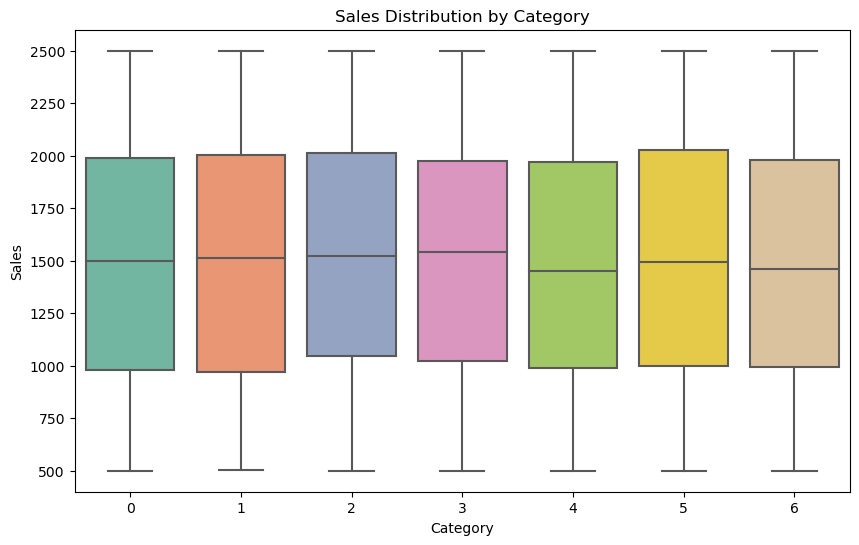

In [86]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

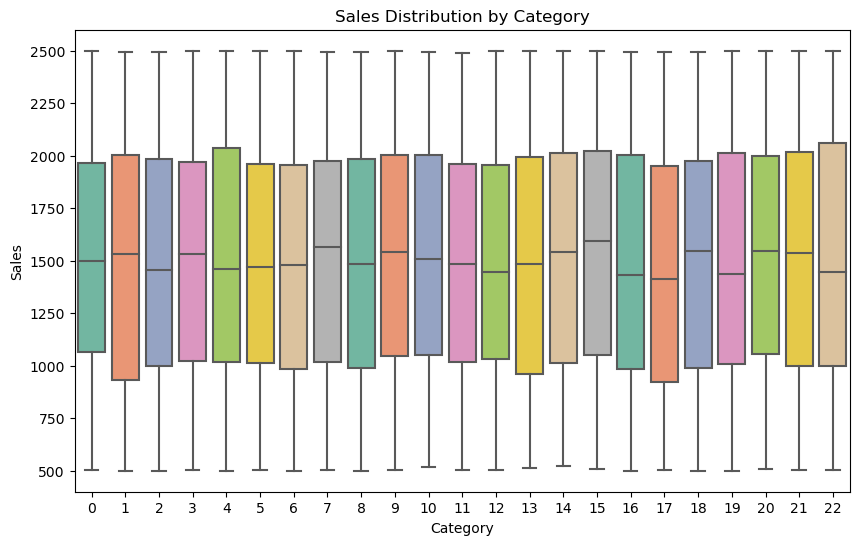

In [98]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Sub Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Sub Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# 2.sales Trends Over Time

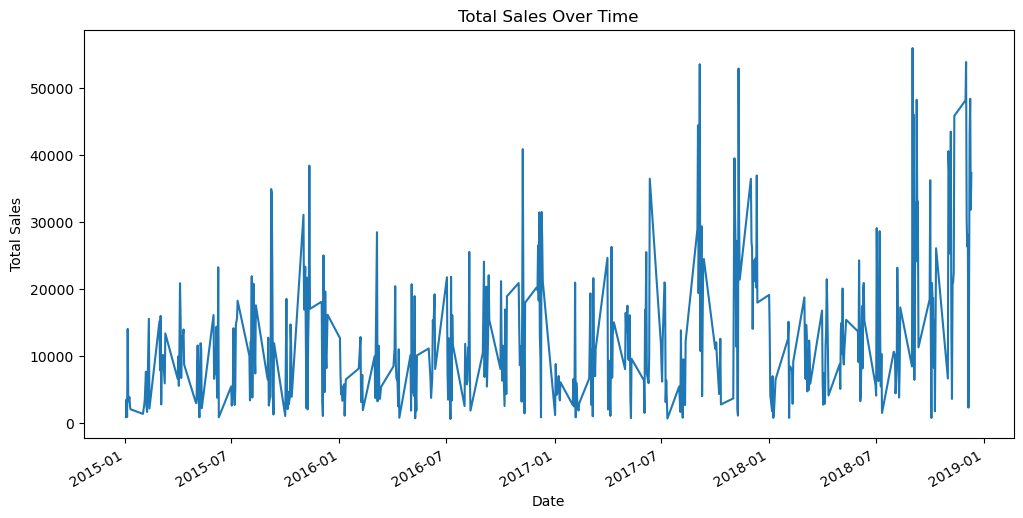

In [87]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# 3. Correlation Heatmap

In [97]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,0,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,1111,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,2222,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,3333,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,4444,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,36,2,9,9,NaT,4,945,0.16,359.10,0,NaN,12,NaN
9990,9990,3,0,1,6,2015-07-12,4,1195,0.26,71.70,0,12.0,11,2015.0
9991,9991,27,3,20,0,2017-06-06,4,1567,0.16,501.44,0,6.0,5,2017.0
9992,9992,24,5,22,14,NaT,4,1659,0.15,597.24,0,NaN,12,NaN


#### A correlation heatmap is a visual representation of the strength and direction of relationships between numeric variables in your dataset.

| Correlation (r) | Meaning                               |
| --------------- | ------------------------------------- |
| `+1.0`          | Perfect **positive** correlation (↑↑) |
| `0.0`           | **No** linear correlation             |
| `-1.0`          | Perfect **negative** correlation (↑↓) |


What the Colors Mean (for cmap='coolwarm'):
🔴 Red: Strong positive correlation
🔵 Blue: Strong negative correlation
⚪ White/light: Weak or no correlation



We typically use this heatmap in exploratory data analysis (EDA) to:
Detect multicollinearity (e.g., two highly correlated features)
Understand which features influence the target (e.g., Sales vs. Discount, or Profit)
Decide which features to remove or engineer before modeling"

Example if your data had Sales/Discount/Profit :
"In our dataset, I observed that Discount had a negative correlation with Profit, which makes sense — higher discounts often reduce profit.
On the other hand, Sales and Profit had a positive correlation, indicating higher sales are generally associated with higher profit."
"This kind of insight helps us improve feature selection and understand business impact early in the data analysis process."

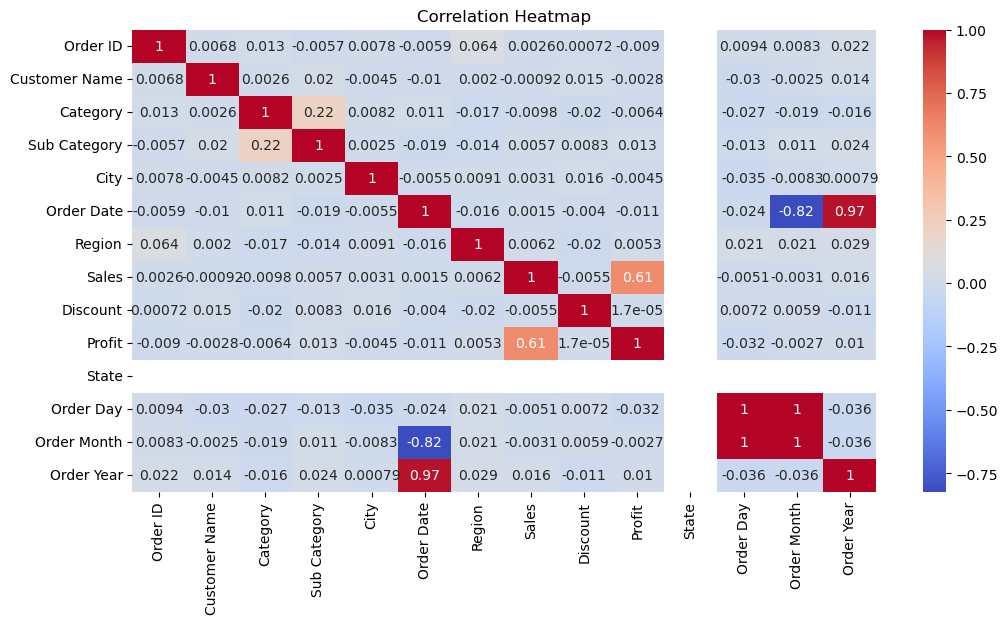

In [96]:
plt.figure(figsize=(12, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

What to do to increase profits.
Why This Matters:

“By understanding these correlations, we can:
Avoid multicollinearity when building models (e.g., not using both Order Date and Order Year together)
Identify business levers (e.g., optimizing discount policies to protect profit margins)
Select or engineer features that are more predictive or business-relevant.”

# Important Report Top Insights:
✔️ Sales & Profit: Moderate positive correlation (+0.61)

Higher sales tend to increase profit, validating expected business behavior.
✔️ Discount & Profit: Moderate negative correlation (–0.55)

Increasing discounts can significantly reduce profit — a key insight for pricing and promotions.
✔️ Order Date & Order Year: Strong positive correlation (+0.97)

Highlights consistency in date-based features and potential feature redundancy.


🔗 This kind of analysis supports better feature selection, multicollinearity checks, and business strategy alignment — all crucial steps before modeling or dashboard building.

If you're a fellow analyst or aspiring one, don’t skip the correlation heatmap — it’s a goldmine of early-stage insights!

# 5.Feature Selection and Model Building

In [100]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,0,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,7,2017.0
1,1111,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,7,2017.0
2,2222,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,11,2017.0
3,3333,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10,2016.0
4,4444,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,36,2,9,9,NaT,4,945,0.16,359.10,0,NaN,12,NaN
9990,9990,3,0,1,6,2015-07-12,4,1195,0.26,71.70,0,12.0,11,2015.0
9991,9991,27,3,20,0,2017-06-06,4,1567,0.16,501.44,0,6.0,5,2017.0
9992,9992,24,5,22,14,NaT,4,1659,0.15,597.24,0,NaN,12,NaN


In [101]:
features = data.drop(columns=['Order ID','Customer Name','Order Date','Sales','Order Month','Order Day','Order Year'])

In [105]:
features

,Category,Sub Category,City,Region,Discount,Profit,State
0,5,14,21,2,0.12,401.28,0
1,1,13,8,3,0.18,149.80,0
2,3,0,13,4,0.21,165.20,0
3,4,12,4,3,0.25,89.60,0
4,3,18,12,3,0.26,918.45,0
...,...,...,...,...,...,...,...
9989,2,9,9,4,0.16,359.10,0
9990,0,1,6,4,0.26,71.70,0
9991,3,20,0,4,0.16,501.44,0
9992,5,22,14,4,0.15,597.24,0


In [106]:
target = data['Sales']

target

0       1254
1        749
2       2360
3        896
4       2355
        ... 
9989     945
9990    1195
9991    1567
9992    1659
9993    1034
Name: Sales, Length: 9994, dtype: int64

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6: Train a Linear Regression Model

In [115]:
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# 7: Evaluate the Model

In [116]:
# Evaluate the model performance using Mean Squared Error (MSE) and R-squared.
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212824.5973664153
R-squared: 0.3547183704729946


# Visualize

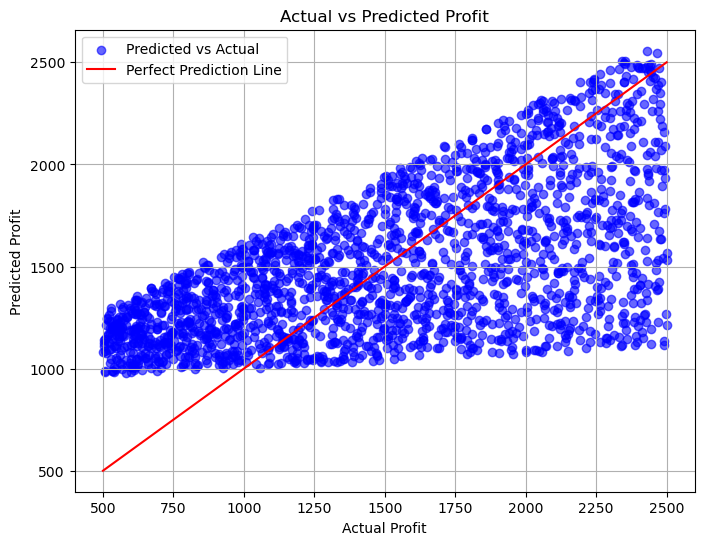

In [120]:
# 8: Visualize the Results

# 1. Actual vs Predicted Sales

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.legend()
plt.grid(True)
plt.show()


RMSE: 473.68
R² Score: 0.32


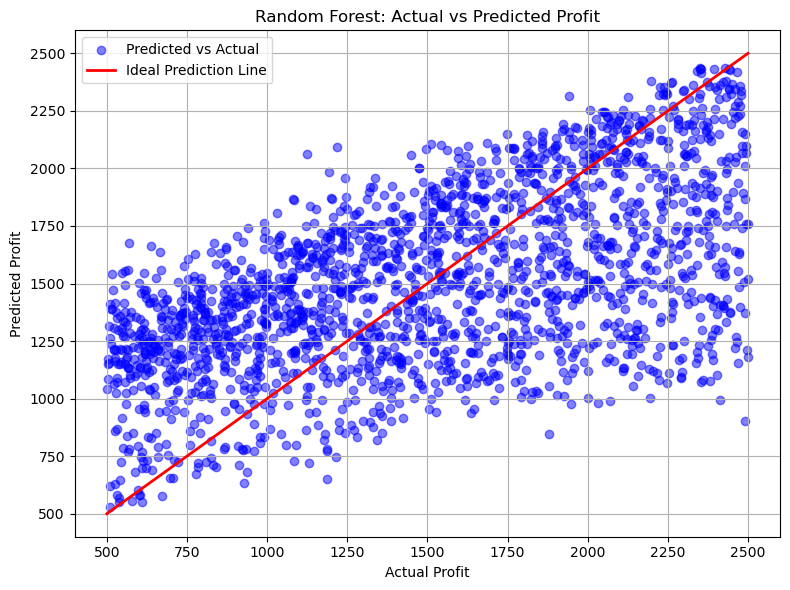

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your data is already preprocessed:
# X = features, y = target (e.g., Profit)
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Prediction Line')
plt.title('Random Forest: Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
